In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('Building_Permits.csv', sep=",")

c:\users\innap\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [4]:
data.shape

(198900, 43)

In [5]:
data.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 198900


# 1. Обработка пропусков в данных
## 1.1. Простые стратегии - удаление или заполнение нулями

In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((198900, 43), (198900, 12))

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((198900, 43), (0, 43))

In [10]:
data.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,0,Ellis,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,0,Geary,St,...,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,0,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,0,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,0,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),0,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,0,Market,St,...,3.0,constr type 3,0.0,0,0,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


# 1.2. "Внедрение значений" - импьютация (imputation)
## 1.2.1. Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Unit. Тип данных float64. Количество пустых значений 169421, 85.18%.
Колонка Number of Existing Stories. Тип данных float64. Количество пустых значений 42784, 21.51%.
Колонка Number of Proposed Stories. Тип данных float64. Количество пустых значений 42868, 21.55%.
Колонка Estimated Cost. Тип данных float64. Количество пустых значений 38066, 19.14%.
Колонка Revised Cost. Тип данных float64. Количество пустых значений 6066, 3.05%.
Колонка Existing Units. Тип данных float64. Количество пустых значений 51538, 25.91%.
Колонка Proposed Units. Тип данных float64. Количество пустых значений 50911, 25.6%.
Колонка Plansets. Тип данных float64. Количество пустых значений 37309, 18.76%.
Колонка Existing Construction Type. Тип данных float64. Количество пустых значений 43366, 21.8%.
Колонка Proposed Construction Type. Тип данных float64. Количество пустых значений 43162, 21.7%.
Колонка Supervisor District. Тип данных float64. Количество пустых значений 1717, 0.86%.
Колонка Zipcode. Тип данн

In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Unit,Number of Existing Stories,Number of Proposed Stories,Estimated Cost,Revised Cost,Existing Units,Proposed Units,Plansets,Existing Construction Type,Proposed Construction Type,Supervisor District,Zipcode
0,NaN,6.0,NaN,4000.00,4000.00,143.0,NaN,2.0,3.0,NaN,3.0,94102.0
1,0.0,7.0,NaN,1.00,500.00,NaN,NaN,2.0,3.0,NaN,3.0,94102.0
2,NaN,6.0,6.0,20000.00,NaN,39.0,39.0,2.0,1.0,1.0,3.0,94109.0
3,0.0,2.0,2.0,2000.00,2000.00,1.0,1.0,2.0,5.0,5.0,3.0,94109.0
4,NaN,3.0,NaN,100000.00,100000.00,NaN,NaN,2.0,3.0,NaN,6.0,94102.0
5,NaN,5.0,5.0,4000.00,4000.00,326.0,326.0,2.0,1.0,1.0,10.0,94107.0
6,0.0,3.0,3.0,12000.00,12000.00,5.0,5.0,0.0,5.0,5.0,5.0,94122.0
7,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,10.0,94124.0
8,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,5.0,94117.0
9,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,8.0,94117.0


c:\users\innap\miniconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\innap\miniconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


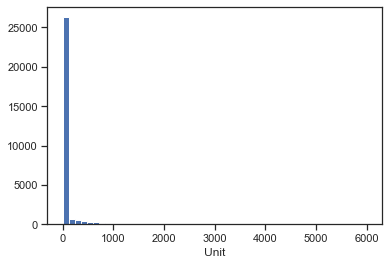

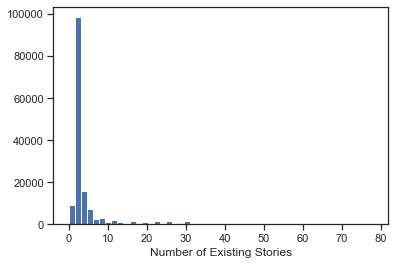

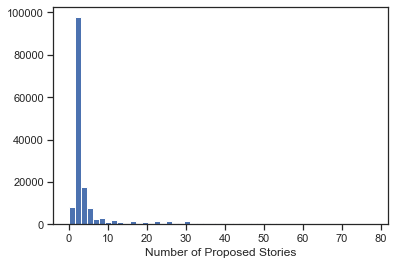

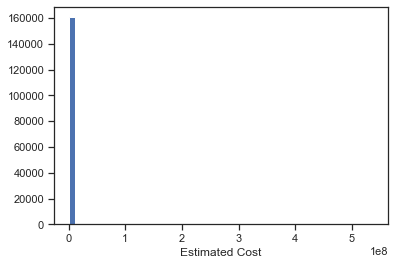

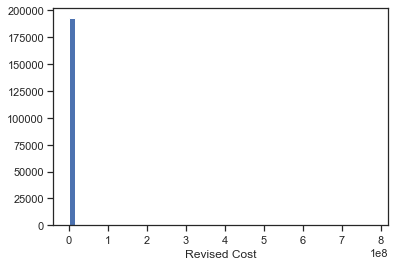

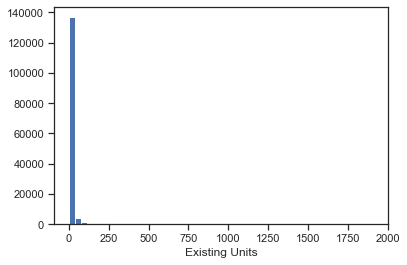

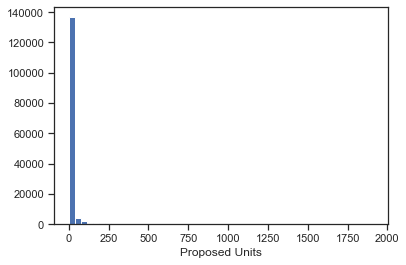

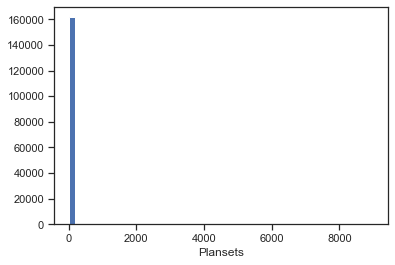

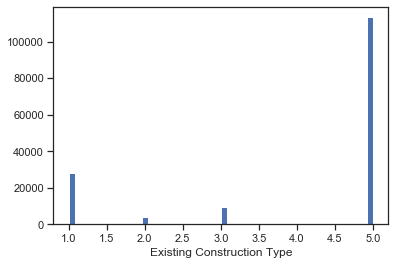

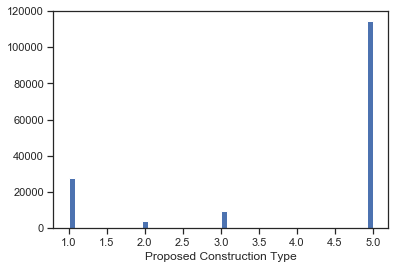

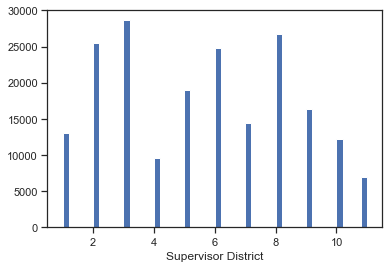

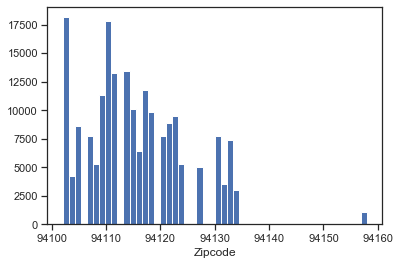

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
# Фильтр по пустым значениям поля Estimated Cost 
data[data['Estimated Cost'].isnull()]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171
10,M805287,8,otc alterations permit,07/06/2017,3541,001,106,NaN,Sanchez,St,...,NaN,NaN,NaN,NaN,NaN,8.0,Castro/Upper Market,94114.0,"(37.767349757757145, -122.43140682973024)",1469445246849
11,M805907,8,otc alterations permit,07/07/2017,0829,021,675,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Hayes Valley,94102.0,"(37.774914087334544, -122.42886839796792)",146961582526
12,M806447,8,otc alterations permit,07/10/2017,6537,023,4082,NaN,25th,St,...,NaN,NaN,NaN,NaN,NaN,8.0,Noe Valley,94114.0,"(37.75006779619502, -122.43127350268124)",1469781206718
14,M813729,8,otc alterations permit,07/26/2017,1049,027,2761,NaN,Pine,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,94115.0,"(37.78676200041077, -122.44124093333335)",147203988249
15,M813907,8,otc alterations permit,07/27/2017,0243,043,840,NaN,Powell,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Chinatown,94108.0,"(37.7926690651263, -122.40883941791454)",147208763456
16,M813967,8,otc alterations permit,07/27/2017,0268,008,220,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Financial District/South Beach,94104.0,"(37.79130641988351, -122.40198579459195)",147211866168
17,M814148,8,otc alterations permit,07/27/2017,3621,097,3707,NaN,21st,St,...,NaN,NaN,NaN,NaN,NaN,8.0,Noe Valley,94114.0,"(37.75607840165479, -122.43041143390109)",1472184412108


In [16]:
# Запоминаем индексы строк с пустыми значениями
flt_index = data[data['Estimated Cost'].isnull()].index
flt_index

Int64Index([     7,      8,      9,     10,     11,     12,     14,     15,
                16,     17,
            ...
            198871, 198876, 198880, 198881, 198883, 198884, 198895, 198897,
            198898, 198899],
           dtype='int64', length=38066)

In [17]:
# Проверяем что выводятся нужные строки
data[data.index.isin(flt_index)]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171
10,M805287,8,otc alterations permit,07/06/2017,3541,001,106,NaN,Sanchez,St,...,NaN,NaN,NaN,NaN,NaN,8.0,Castro/Upper Market,94114.0,"(37.767349757757145, -122.43140682973024)",1469445246849
11,M805907,8,otc alterations permit,07/07/2017,0829,021,675,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Hayes Valley,94102.0,"(37.774914087334544, -122.42886839796792)",146961582526
12,M806447,8,otc alterations permit,07/10/2017,6537,023,4082,NaN,25th,St,...,NaN,NaN,NaN,NaN,NaN,8.0,Noe Valley,94114.0,"(37.75006779619502, -122.43127350268124)",1469781206718
14,M813729,8,otc alterations permit,07/26/2017,1049,027,2761,NaN,Pine,St,...,NaN,NaN,NaN,NaN,NaN,2.0,Pacific Heights,94115.0,"(37.78676200041077, -122.44124093333335)",147203988249
15,M813907,8,otc alterations permit,07/27/2017,0243,043,840,NaN,Powell,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Chinatown,94108.0,"(37.7926690651263, -122.40883941791454)",147208763456
16,M813967,8,otc alterations permit,07/27/2017,0268,008,220,NaN,Montgomery,St,...,NaN,NaN,NaN,NaN,NaN,3.0,Financial District/South Beach,94104.0,"(37.79130641988351, -122.40198579459195)",147211866168
17,M814148,8,otc alterations permit,07/27/2017,3621,097,3707,NaN,21st,St,...,NaN,NaN,NaN,NaN,NaN,8.0,Noe Valley,94114.0,"(37.75607840165479, -122.43041143390109)",1472184412108


In [18]:
# фильтр по колонке
data_num[data_num.index.isin(flt_index)]['Estimated Cost']

7        NaN
8        NaN
9        NaN
10       NaN
11       NaN
12       NaN
14       NaN
15       NaN
16       NaN
17       NaN
19       NaN
20       NaN
23       NaN
26       NaN
27       NaN
28       NaN
29       NaN
30       NaN
31       NaN
32       NaN
34       NaN
35       NaN
36       NaN
37       NaN
38       NaN
39       NaN
40       NaN
41       NaN
43       NaN
44       NaN
          ..
198822   NaN
198824   NaN
198830   NaN
198831   NaN
198833   NaN
198837   NaN
198840   NaN
198841   NaN
198842   NaN
198843   NaN
198847   NaN
198850   NaN
198858   NaN
198859   NaN
198861   NaN
198862   NaN
198865   NaN
198868   NaN
198869   NaN
198870   NaN
198871   NaN
198876   NaN
198880   NaN
198881   NaN
198883   NaN
198884   NaN
198895   NaN
198897   NaN
198898   NaN
198899   NaN
Name: Estimated Cost, Length: 38066, dtype: float64

In [19]:
data_num_EstCost = data_num[['Estimated Cost']]
data_num_EstCost.head()

,Estimated Cost
0,4000.0
1,1.0
2,20000.0
3,2000.0
4,100000.0


In [20]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [21]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_EstCost)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [22]:
strategies=['mean', 'median','most_frequent']

In [23]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_EstCost)
    return data_num_imp[mask_missing_values_only]

In [24]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([168955.44329682, 168955.44329682, 168955.44329682, ...,
        168955.44329682, 168955.44329682, 168955.44329682]))

In [25]:
strategies[1], test_num_impute(strategies[1])

('median', array([11000., 11000., 11000., ..., 11000., 11000., 11000.]))

In [26]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([1., 1., 1., ..., 1., 1., 1.]))

In [27]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [28]:
data[['Revised Cost']].describe()

,Revised Cost
count,1.928340e+05
mean,1.328562e+05
std,3.584903e+06
min,0.000000e+00
25%,1.000000e+00
50%,7.000000e+03
75%,2.870750e+04
max,7.805000e+08


In [29]:
test_num_impute_col(data, 'Revised Cost', strategies[0])

('Revised Cost', 'mean', 6066, 132856.1864917494, 132856.1864917494)

In [30]:
test_num_impute_col(data, 'Revised Cost', strategies[1])

('Revised Cost', 'median', 6066, 7000.0, 7000.0)

In [31]:
test_num_impute_col(data, 'Revised Cost', strategies[2])

('Revised Cost', 'most_frequent', 6066, 1.0, 1.0)

# 2. Обработка пропусков в категориальных данных

In [32]:
data = pd.read_csv('vehicles.csv')

In [33]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка manufacturer. Тип данных object. Количество пустых значений 22764, 11.44%.
Колонка model. Тип данных object. Количество пустых значений 7989, 4.02%.
Колонка condition. Тип данных object. Количество пустых значений 231934, 116.61%.
Колонка cylinders. Тип данных object. Количество пустых значений 199683, 100.39%.
Колонка fuel. Тип данных object. Количество пустых значений 3985, 2.0%.
Колонка title_status. Тип данных object. Количество пустых значений 3062, 1.54%.
Колонка transmission. Тип данных object. Количество пустых значений 3719, 1.87%.
Колонка vin. Тип данных object. Количество пустых значений 207425, 104.29%.
Колонка drive. Тип данных object. Количество пустых значений 144143, 72.47%.
Колонка size. Тип данных object. Количество пустых значений 342003, 171.95%.
Колонка type. Тип данных object. Количество пустых значений 141531, 71.16%.
Колонка paint_color. Тип данных object. Количество пустых значений 164706, 82.81%.
Колонка image_url. Тип данных object. Количество пустых 

In [34]:
cat_temp_data = data[['model']]
cat_temp_data.head()

,model
0,golf r
1,f-150
2,sierra 1500
3,f-150
4,f-450


In [35]:
cat_temp_data['model'].unique()

array(['golf r', 'f-150', 'sierra 1500', ..., 'Camaro 2-door coupe',
       'Isuzu VehiCROSS', 'peterbilt 378'], dtype=object)

In [36]:
cat_temp_data[cat_temp_data['model'].isnull()].shape

(7989, 1)

In [37]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['golf r'],
       ['f-150'],
       ['sierra 1500'],
       ...,
       ['cherokee'],
       ['Porsche Macan GTS'],
       ['f-150']], dtype=object)

In [38]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['#350', '#4', '$1500 DOWN PAYMENT', ..., 'É\x9bÌ\x83fini MS-9',
       'â\x80\x9898 Astro',
       'ð\x9d\x97\x9fð\x9d\x97¶ð\x9d\x97»ð\x9d\x97°ð\x9d\x97¼ð\x9d\x97¹ð\x9d\x97» ð\x9d\x97\xa0ð\x9d\x97\x9eð\x9d\x97¦ ð\x9d\x9f¯.ð\x9d\x9f³ð\x9d\x97\x9f ð\x9d\x97\x94ð\x9d\x97ªð\x9d\x97\x97'],
      dtype=object)

In [39]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='!!!')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['golf r'],
       ['f-150'],
       ['sierra 1500'],
       ...,
       ['cherokee'],
       ['Porsche Macan GTS'],
       ['!!!']], dtype=object)

In [40]:
np.unique(data_imp3)

array(['!!!', '#350', '#4', ..., 'É\x9bÌ\x83fini MS-9',
       'â\x80\x9898 Astro',
       'ð\x9d\x97\x9fð\x9d\x97¶ð\x9d\x97»ð\x9d\x97°ð\x9d\x97¼ð\x9d\x97¹ð\x9d\x97» ð\x9d\x97\xa0ð\x9d\x97\x9eð\x9d\x97¦ ð\x9d\x9f¯.ð\x9d\x9f³ð\x9d\x97\x9f ð\x9d\x97\x94ð\x9d\x97ªð\x9d\x97\x97'],
      dtype=object)

In [41]:
data_imp3[data_imp3=='!!!'].size

7989

# 2. Преобразование категориальных признаков в числовые

In [42]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,golf r
1,f-150
2,sierra 1500
3,f-150
4,f-450
5,f-150
6,f-350
7,sierra
8,f-250
9,f-150


# Кодирование категорий целочисленными значениями - label encoding¶

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [44]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [45]:
cat_enc['c1'].unique()

array(['golf r', 'f-150', 'sierra 1500', ..., 'Camaro 2-door coupe',
       'Isuzu VehiCROSS', 'peterbilt 378'], dtype=object)

In [46]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 35849, 35850, 35851])

In [47]:
le.inverse_transform([0, 1, 2, 3])

array(['#350', '#4', '$1500 DOWN PAYMENT', '$500 DOWN PROGRAMS!'],
      dtype=object)

# Кодирование категорий наборами бинарных значений - one-hot encoding

In [48]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [49]:
cat_enc.shape

(509577, 1)

In [50]:
cat_enc_ohe.shape

(509577, 35852)

In [51]:
cat_enc_ohe

<509577x35852 sparse matrix of type '<class 'numpy.float64'>'
	with 509577 stored elements in Compressed Sparse Row format>

In [24]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
cat_enc.head(10)

,c1
0,golf r
1,f-150
2,sierra 1500
3,f-150
4,f-450
5,f-150
6,f-350
7,sierra
8,f-250
9,f-150


#  Pandas get_dummies - быстрый вариант one-hot кодирования

In [57]:
pd.get_dummies(cat_enc[:30000]).head(2)

MemoryError: 

In [27]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,model_08 titan,model_1 series,"model_117,000",model_122S Amazon,model_124 spider,model_128i,model_135i,model_135i convertible,model_150 xl,model_1500,...,model_yukon xl,model_yukon xl 1500,model_yukon xl denali,model_yukon xl slt,model_yukon xl slt-2 1/2 ton 4wd,model_z3,model_z3 2.3 roadster,model_z3 roadster,model_z4,model_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3 Масштабирование данных

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## 3.1. MinMax масштабирование

In [34]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['odometer']])

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


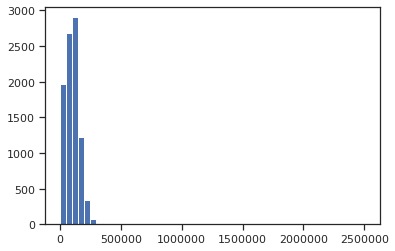

In [35]:
plt.hist(data['odometer'], 50)
plt.show()

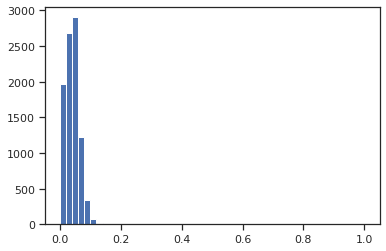

In [36]:
plt.hist(sc1_data, 50)
plt.show()

## 3.2. Масштабирование данных на основе Z-оценки - StandardScaler

In [37]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['odometer']])

/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/srv/conda/envs/notebook/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


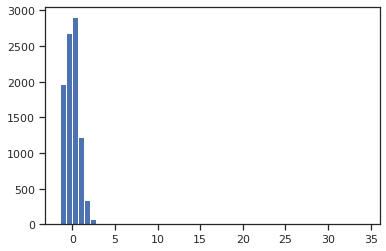

In [38]:
plt.hist(sc2_data, 50)
plt.show()

## 3.3. Нормализация данных

In [43]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['odometer']])

In [67]:
dict = {'odometer': 0}
data = data.fillna(dict)

In [68]:
data[data['odometer'].isnull()]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long


In [69]:
sc3 = Normalizer()
sc3_data = sc3.fit_transform(data[['odometer']])

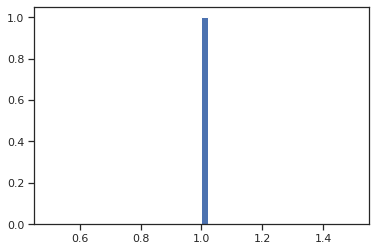

In [70]:
plt.hist(sc3_data, 50)
plt.show()